Rewind-and-regrow approach is *not* guaranteed to yield the same tree, because small imprecisions accumulated during increment_mean_and_var_sum make the split decision non-deterministic.

In [1]:
import os; os.chdir("..")
import sys; sys.path.append("../../Path_Scripts")
from rlutils.observers.pbrl import load
import matplotlib.pyplot as plt
from torch import set_printoptions
set_printoptions(precision=3, edgeitems=10, linewidth=200, sci_mode=False)
from hyperrectangles.rules import diagram
from hyperrectangles.visualise import show_split_quality

In [2]:
pbrl50 = load("models/epic_20-04/pets-tree_fine-capybara-77/50.pbrl", {})
pbrl200 = load("models/epic_20-04/pets-tree_fine-capybara-77/200.pbrl", {})

Loaded models/epic_20-04/pets-tree_fine-capybara-77/50.pbrl
Loaded models/epic_20-04/pets-tree_fine-capybara-77/200.pbrl


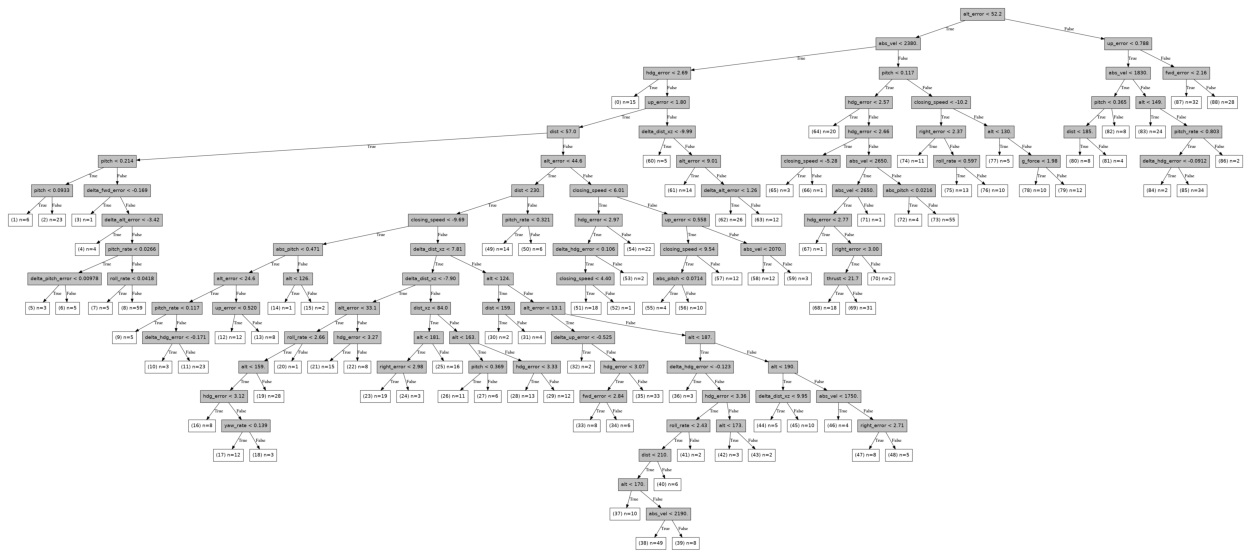

In [13]:
_, ax = plt.subplots(figsize=(30,10)); plt.axis("off")
ax.imshow(diagram(pbrl50.model.tree, out_as="plt"))

In [20]:
(len(pbrl50.model.tree), len(pbrl200.model.tree)), (pbrl50.model.tree.root.num_samples, pbrl200.model.tree.root.num_samples)

((89, 79), (1000, 4000))

In [3]:
pbrl200.model.P["store_all_qual"] = True

In [13]:
rewound_graph = pbrl200.graph.rewind_subgraph(50)
pbrl200.model.update(rewound_graph, "rw")

Connected episodes: 50 / 50


Splitting: 100%|██████████| 100/100 [00:06<00:00, 14.54it/s]


Connected episodes: 50 / 50


Pruning: 199it [00:05, 37.86it/s]                 

def reward_function(x):
    if x[4] < 52.190: # alt_error
        if x[21] < 2381.6: # abs_vel
            if x[13] < 2.6887: # hdg_error
                return -2.2965 # n=15, std=0.18454
            else:
                if x[17] < 1.8020: # up_error
                    if x[0] < 57.038: # dist
                        if x[8] < 0.21417: # pitch
                            if x[9] < 0.093309: # abs_pitch
                                return -1.3414 # n=6, std=0.27353
                            else:
                                return -0.84694 # n=23, std=0.24879
                        else:
                            if x[16] < -0.1693: # delta_fwd_error
                                return -1.7429 # n=1, std=0.0000
                            else:
                                if x[5] < -3.4240: # delta_alt_error
                                    return -1.0252 # n=4, std=0.0000
                                else:
                                    if x[23] < 0.026

{'preference_loss': 0.08310919666762977, 'num_leaves': 87}

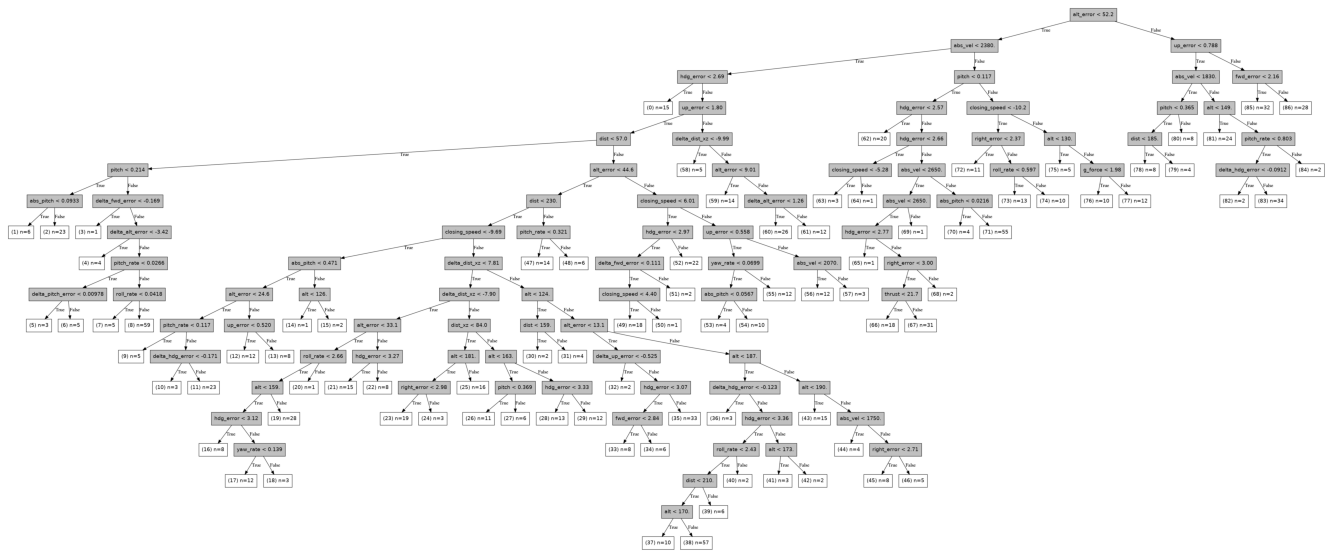

In [15]:
_, ax = plt.subplots(figsize=(30,10)); plt.axis("off")
ax.imshow(diagram(pbrl200.model.tree, out_as="plt"))

In [14]:
(len(pbrl50.model.tree), len(pbrl200.model.tree)), (pbrl50.model.tree.root.num_samples, pbrl200.model.tree.root.num_samples)

((89, 87), (1000, 1000))

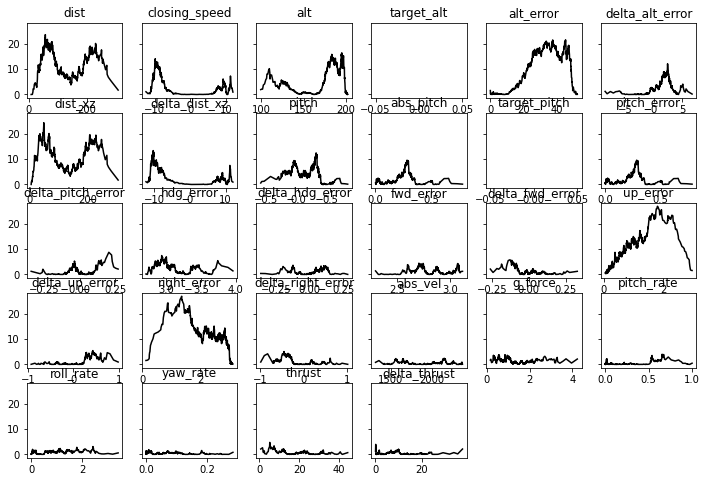

In [16]:
show_split_quality(pbrl200.model.tree.root.left.left.right);

In [12]:
{k: v.max() for k,v in pbrl200.model.tree.root.left.left.right.all_qual.items()}

{0: 23.64767766760647,
 1: 14.129856281470875,
 2: 16.452707393634384,
 3: nan,
 4: 21.589231870099383,
 5: 12.12468409031978,
 6: 24.411643295476424,
 7: 13.38210401400779,
 8: 12.461157301511555,
 9: 9.592669468046145,
 10: nan,
 11: 9.592669468046145,
 12: 8.753027031036613,
 13: 7.460786613959049,
 14: 3.638515453514583,
 15: 4.437827791650628,
 16: 5.796915648060505,
 17: 26.93119361196245,
 18: 5.461740755540189,
 19: 26.931193611962552,
 20: 5.084387597008876,
 21: 2.3866361645061454,
 22: 3.854142507822895,
 23: 4.01758238270291,
 24: 3.0984696546361725,
 25: 1.8834351430382017,
 26: 4.735214797997727,
 27: 3.9548345105623577}

In [17]:
{k: v.max() for k,v in pbrl200.model.tree.root.left.left.right.all_qual.items()}

{0: 23.647683285158074,
 1: 14.129854001302247,
 2: 16.45271807284776,
 3: nan,
 4: 21.589240896681616,
 5: 12.124683197807474,
 6: 24.41164945025441,
 7: 13.382107425776967,
 8: 12.461157940083108,
 9: 9.592670107489251,
 10: nan,
 11: 9.592670107489251,
 12: 8.75303158899876,
 13: 7.460782789381621,
 14: 3.6385144712761095,
 15: 4.437828845539911,
 16: 5.796914169251115,
 17: 26.93118371559712,
 18: 5.461738516976918,
 19: 26.93118371559613,
 20: 5.0843862953005505,
 21: 2.3866370269095136,
 22: 3.854144199767846,
 23: 4.017583012243384,
 24: 3.098468382259018,
 25: 1.8834342168902478,
 26: 4.735215844806752,
 27: 3.9548321889336955}